In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import fiona
import rtree

pd.options.display.max_rows = 10

In [2]:
import fiona
import rtree

In [5]:
barrios = pd.read_csv("barrios.csv", encoding='latin1')

In [6]:
barrios.head(10)

,WKT,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06
5,"POLYGON ((-58.4306058283309 -34.6070470885963,...",CABALLITO,6.0,10990.964471,6.851029e+06
6,"POLYGON ((-58.4819203599833 -34.6242871724757,...",VILLA SANTA RITA,11.0,5757.752335,2.153691e+06
7,"POLYGON ((-58.5034920611534 -34.6240324216321,...",MONTE CASTRO,10.0,7361.036418,2.627481e+06
8,"POLYGON ((-58.525116079791 -34.613999981063,-5...",VILLA REAL,10.0,5070.965652,1.334146e+06
9,"POLYGON ((-58.4452515823782 -34.6420397134706,...",FLORES,7.0,15772.425185,8.590784e+06


In [7]:
def from_wkt(df, wkt_column):
    import shapely.wkt
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(barrios, geometry='coordinates')
    return gdf
    

In [8]:
barrios = from_wkt(barrios, "WKT")

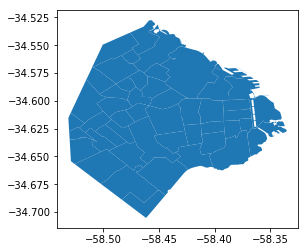

In [9]:
barrios.plot()

In [10]:
barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,coordinates
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((-58.4528200492791 -34.5959886570639,..."
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((-58.4655768128541 -34.5965577078058,..."
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06,"POLYGON ((-58.4237529813037 -34.5978273383243,..."
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((-58.4946097568899 -34.6148652395239,..."
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((-58.4128700313089 -34.6141162515854,..."


In [11]:
mis_barrios = barrios[barrios.BARRIO.isin(["PALERMO", 'BELGRANO', 'RECOLETA'])]

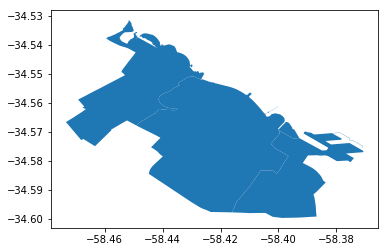

In [12]:
mis_barrios.plot()

In [14]:
data = pd.read_csv("./DATA/properattilimpio.csv", encoding='latin1')

In [15]:
data.rename(columns={'lat' : 'latitud', 'lon' : 'longitud'}, inplace = True) 

In [16]:
def from_x_y(df, x, y):
    from shapely.geometry import Point
    gdf = geopandas.GeoDataFrame(df,
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

In [17]:
data = from_x_y(data, "longitud","latitud")

In [18]:
result=geopandas.sjoin(mis_barrios, data, how = "left")

C:\Users\juan\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')
C:\Users\juan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [19]:
result = result.drop(result.columns[[0, 2, 3, 4, 5]], axis=1)


In [20]:
result = result.set_index('index_right')

In [21]:
result.rename(columns={'BARRIO_left' : 'BARRIO', 'BARRIO_right' : 'SUBBARRIO'}, inplace = True) 

In [22]:
result = from_x_y(result, "longitud","latitud")

In [23]:
result.to_csv(".pal-bel-rec.csv")

In [0]:
from google.colab import files
files.download('.pal-bel-rec.csv')